<a href="https://colab.research.google.com/github/ab17254/ce888/blob/main/Lab3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix, f1_score, classification_report
from sklearn.dummy import DummyClassifier

sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv', delimiter=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [36]:
features = [
            'age',
            'job',
            'marital',
            'education',
            'default',
            'housing',
            'loan',
            'contact',
            'month',
            'day_of_week',
            'campaign',
            'pdays',
            'previous',
            'poutcome',
            'emp.var.rate',
            'cons.price.idx',
            'cons.conf.idx',
            'euribor3m',
            'nr.employed'
]

In [3]:
df = df.drop(['duration'], axis=1)

In [40]:
df = df.dropna()
df.shape

(41188, 20)

In [5]:
string_types = ['job', 'marital', 'education', 'default', 'housing','loan','contact','month','day_of_week','poutcome', 'y']
for x in string_types:
  df[[x]] = df[[x]].apply(LabelEncoder().fit_transform)

In [6]:
df_dummies = pd.get_dummies(df)

In [7]:
x = df.loc[:, df.columns != 'y'].to_numpy()
y = df.loc[:, df.columns == 'y'].to_numpy()

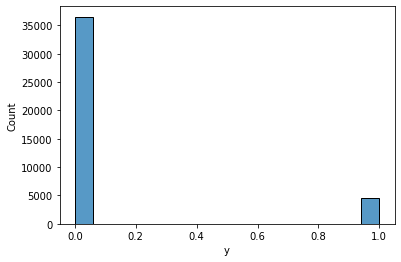

In [8]:
sns_plot = sns.histplot(df['y'])

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50, stratify=y)

In [10]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(x_train, y_train)
print("Dummy ACC: %.2f" % acc(y_train, dummy_clf.predict(x_train)))

Dummy ACC: 0.80


In [51]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3)
scores = cross_val_score(clf, x_train, y_train.ravel(), cv=10, scoring=make_scorer(acc))
clf.fit(x_train, y_train.ravel())
pred = clf.predict(x_test)
print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))

ACC: 0.90 +/- 0.00


In [52]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.70      0.20      0.31       928

    accuracy                           0.90      8238
   macro avg       0.80      0.59      0.63      8238
weighted avg       0.88      0.90      0.87      8238



In [20]:
param_grid = {'n_estimators': [50, 75,100,125,150],
              'max_depth': [1,3,5,10]}
clf_cv = GridSearchCV(RandomForestClassifier(), param_grid, refit=True)
clf_cv.fit(x_train, y_train.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
cv_score = cross_val_score(clf_cv, x_train, y_train.ravel(), cv=10, scoring=make_scorer(acc))

In [23]:
print("ACC: %.2f +/- %.2f" % (cv_score.mean(), cv_score.std()))
print(clf_cv.best_params_)

ACC: 0.90 +/- 0.00
{'max_depth': 10, 'n_estimators': 75}


[18 17 11 13 14 16 15  8 12  0  7  4  3  9 10  1  2  6  5]
Feature ranking:
1. nr.employed (0.272226)
2. euribor3m (0.176951)
3. pdays (0.162731)
4. poutcome (0.116329)
5. emp.var.rate (0.094173)
6. cons.conf.idx (0.065177)
7. cons.price.idx (0.044641)
8. month (0.028040)
9. previous (0.018827)
10. age (0.007690)
11. contact (0.005226)
12. default (0.004351)
13. education (0.001285)
14. day_of_week (0.001092)
15. campaign (0.000672)
16. job (0.000305)
17. marital (0.000225)
18. loan (0.000035)
19. housing (0.000025)


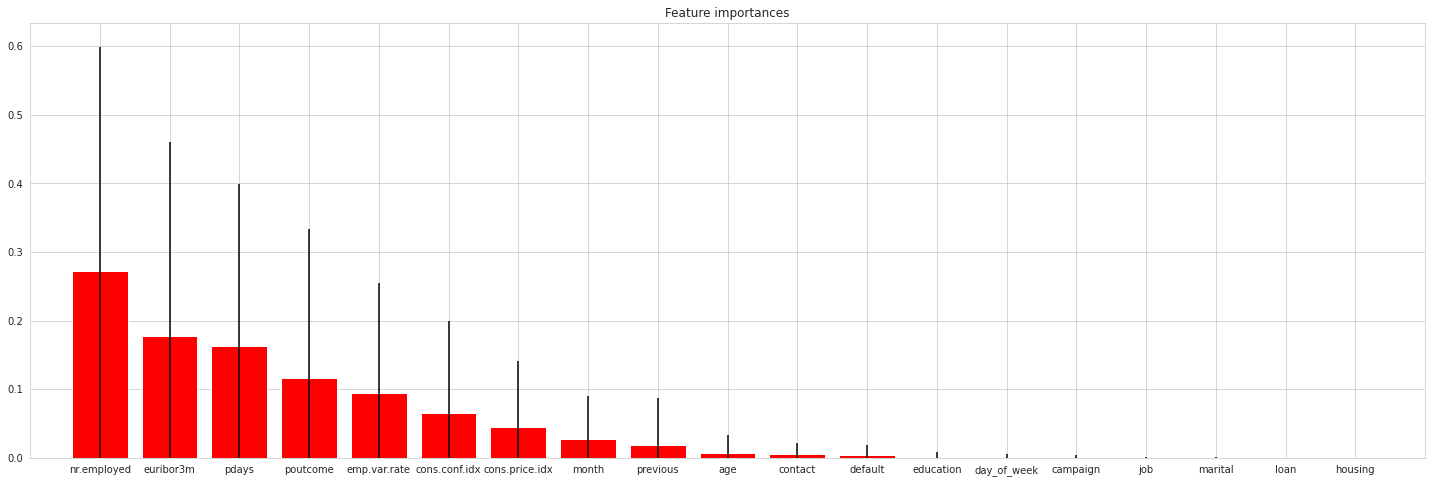

In [55]:
importance = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importance)[::-1]
print(indices)

print("Feature ranking:")
for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importance[indices[f]]))
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importance[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), np.array(features)[indices])
plt.xlim([-1, x_train.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(25, 8)
